This notebook graphs the average error of an interpreted variable as n increases

In [27]:
# Import libraries

import pandas as pd
import geopandas
import numpy as np
import requests
from io import BytesIO
import folium
from IPython.display import clear_output
from itertools import chain

In [80]:
nsets = [2,3,4,5,6,7,8,9,10,25,50,100]

datasets = []

for n in nsets:
    data = pd.read_csv("estimates" + str(n) + ".csv")
    datasets.append(data)

In [81]:
means = [x.mean(axis=0) for x in datasets]
means = [x.drop(["GEOID", "state", "county", "tract"]) for x in means]
means = pd.concat(means, axis=1).T
means.index = nsets

<AxesSubplot: >

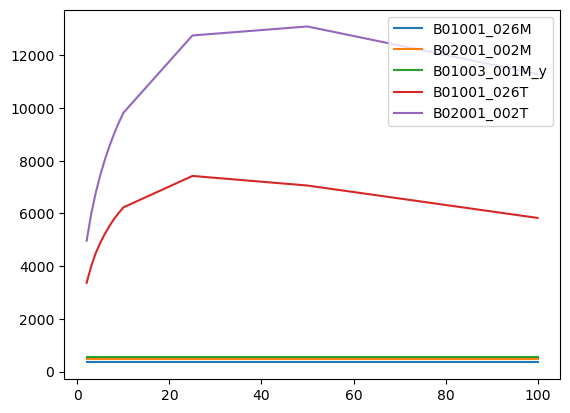

In [82]:
means[["B01001_026M", "B02001_002M", "B01003_001M_y", "B01001_026T", "B02001_002T"]].plot.line()

In [83]:
for i in range(13):
    print(datasets[i].loc[datasets[i]["B02001_002T"] == 0.0].shape)

(1, 16)
(2, 16)
(2, 16)
(2, 16)
(2, 16)
(2, 16)
(2, 16)
(2, 16)
(2, 16)
(4, 16)
(9, 16)
(14, 16)


IndexError: list index out of range

<AxesSubplot: >

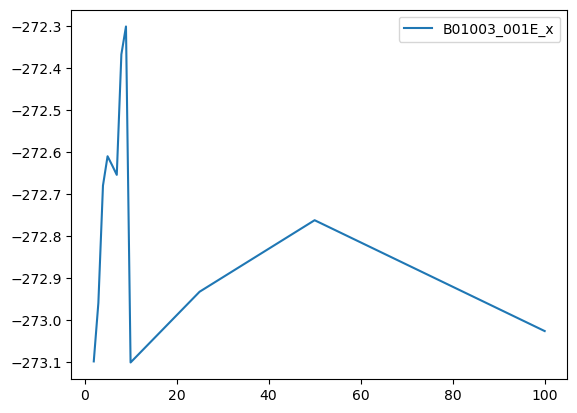

In [84]:
means[["B01003_001E_x"]].subtract(means[["B01003_001E_y"]].values).plot.line()


In [85]:
"B01001_026E_y","B02001_002E_x",

('B01001_026E_y', 'B02001_002E_x')

In [86]:
means.dtypes

B01003_001E_x    float64
B02001_002E_x    float64
B01001_026E_x    float64
B01003_001M_x    float64
B02001_002T      float64
B01001_026T      float64
B01003_001E_y    float64
B01003_001M_y    float64
B02001_002E_y    float64
B02001_002M      float64
B01001_026E_y    float64
B01001_026M      float64
dtype: object